## Exoplanet Data Report

**By:** Kelly Caldwell

https://www.kaggle.com/mrisdal/open-exoplanet-catalogue/data


Intro

Type intro here. Text to be added.

In [73]:
import pandas as pd
import numpy as np
from numpy import nan as NA

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import scipy as scipy
from scipy.stats import ttest_ind

In [74]:
df = pd.read_csv('oec.csv')

In [75]:
df.dtypes

PlanetIdentifier         object
TypeFlag                  int64
PlanetaryMassJpt        float64
RadiusJpt               float64
PeriodDays              float64
SemiMajorAxisAU         float64
Eccentricity            float64
PeriastronDeg           float64
LongitudeDeg            float64
AscendingNodeDeg        float64
InclinationDeg          float64
SurfaceTempK            float64
AgeGyr                  float64
DiscoveryMethod          object
DiscoveryYear           float64
LastUpdated              object
RightAscension           object
Declination              object
DistFromSunParsec       float64
HostStarMassSlrMass     float64
HostStarRadiusSlrRad    float64
HostStarMetallicity     float64
HostStarTempK           float64
HostStarAgeGyr          float64
ListsPlanetIsOn          object
dtype: object

In [76]:
df.isnull().sum()

PlanetIdentifier           0
TypeFlag                   0
PlanetaryMassJpt        2271
RadiusJpt                810
PeriodDays                99
SemiMajorAxisAU         2178
Eccentricity            2476
PeriastronDeg           3256
LongitudeDeg            3541
AscendingNodeDeg        3538
InclinationDeg          2919
SurfaceTempK            2843
AgeGyr                  3582
DiscoveryMethod           63
DiscoveryYear             10
LastUpdated                8
RightAscension            10
Declination               10
DistFromSunParsec       1451
HostStarMassSlrMass      168
HostStarRadiusSlrRad     321
HostStarMetallicity     1075
HostStarTempK            129
HostStarAgeGyr          3067
ListsPlanetIsOn            0
dtype: int64

In [77]:
df.drop(['PlanetaryMassJpt', 'SemiMajorAxisAU', 'Eccentricity', 'PeriastronDeg', 'LongitudeDeg', 'AscendingNodeDeg', 'InclinationDeg', 'SurfaceTempK', 'AgeGyr', 'HostStarAgeGyr'], axis=1, inplace=True)

In [78]:
df.isnull().sum()

PlanetIdentifier           0
TypeFlag                   0
RadiusJpt                810
PeriodDays                99
DiscoveryMethod           63
DiscoveryYear             10
LastUpdated                8
RightAscension            10
Declination               10
DistFromSunParsec       1451
HostStarMassSlrMass      168
HostStarRadiusSlrRad     321
HostStarMetallicity     1075
HostStarTempK            129
ListsPlanetIsOn            0
dtype: int64

In [79]:
df['DiscoveryYear'] = df['DiscoveryYear'].fillna((df['DiscoveryYear'].median()))

In [80]:
df['HostStarMassSlrMass'] = df['HostStarMassSlrMass'].fillna((df['HostStarMassSlrMass'].median()))

In [81]:
df['HostStarTempK'] = df['HostStarTempK'].fillna((df['HostStarTempK'].median()))

In [82]:
df.isnull().sum()

PlanetIdentifier           0
TypeFlag                   0
RadiusJpt                810
PeriodDays                99
DiscoveryMethod           63
DiscoveryYear              0
LastUpdated                8
RightAscension            10
Declination               10
DistFromSunParsec       1451
HostStarMassSlrMass        0
HostStarRadiusSlrRad     321
HostStarMetallicity     1075
HostStarTempK              0
ListsPlanetIsOn            0
dtype: int64

In [83]:
del df['LastUpdated']

In [84]:
del df['Declination']

In [85]:
del df['RightAscension']

In [86]:
df.isnull().sum()

PlanetIdentifier           0
TypeFlag                   0
RadiusJpt                810
PeriodDays                99
DiscoveryMethod           63
DiscoveryYear              0
DistFromSunParsec       1451
HostStarMassSlrMass        0
HostStarRadiusSlrRad     321
HostStarMetallicity     1075
HostStarTempK              0
ListsPlanetIsOn            0
dtype: int64

In [87]:
df.head()

,PlanetIdentifier,TypeFlag,RadiusJpt,PeriodDays,DiscoveryMethod,DiscoveryYear,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,ListsPlanetIsOn
0,HD 143761 b,0,NaN,39.845800,RV,2016.0,17.236,0.889,1.362,-0.31,5627.0,Confirmed planets
1,HD 143761 c,0,NaN,102.540000,RV,2016.0,17.236,0.889,1.362,-0.31,5627.0,Confirmed planets
2,KOI-1843.03,0,0.054,0.176891,transit,2012.0,NaN,0.460,0.450,0.00,3584.0,Controversial
3,KOI-1843.01,0,0.114,4.194525,transit,2014.0,NaN,0.460,0.450,0.00,3584.0,Controversial
4,KOI-1843.02,0,0.071,6.356006,transit,2014.0,NaN,0.460,0.450,0.00,3584.0,Controversial


In [88]:
df.describe()

,TypeFlag,RadiusJpt,PeriodDays,DiscoveryYear,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK
count,3584.000000,2774.000000,3485.000000,3584.000000,2133.000000,3584.000000,3263.000000,2509.000000,3584.000000
mean,0.097656,0.371190,537.248317,2013.302455,554.912346,0.982933,1.495629,0.016228,5510.139118
std,0.424554,0.416871,7509.660676,6.151183,847.566803,0.311496,3.071298,0.193495,1182.636414
min,0.000000,0.002300,0.090706,1781.000000,1.295000,0.012000,0.000014,-2.090000,540.000000
25%,0.000000,0.141062,4.757940,2013.000000,60.000000,0.840000,0.810000,-0.050000,5147.000000
50%,0.000000,0.209600,13.071630,2014.000000,333.000000,0.977000,1.000000,0.020000,5634.000000
75%,0.000000,0.321518,49.514000,2016.000000,773.130000,1.100000,1.250000,0.100000,5938.000000
max,3.000000,6.000000,320000.000000,2017.000000,8500.000000,4.500000,51.100000,0.560000,29300.000000


In [89]:
df.shape

(3584, 12)

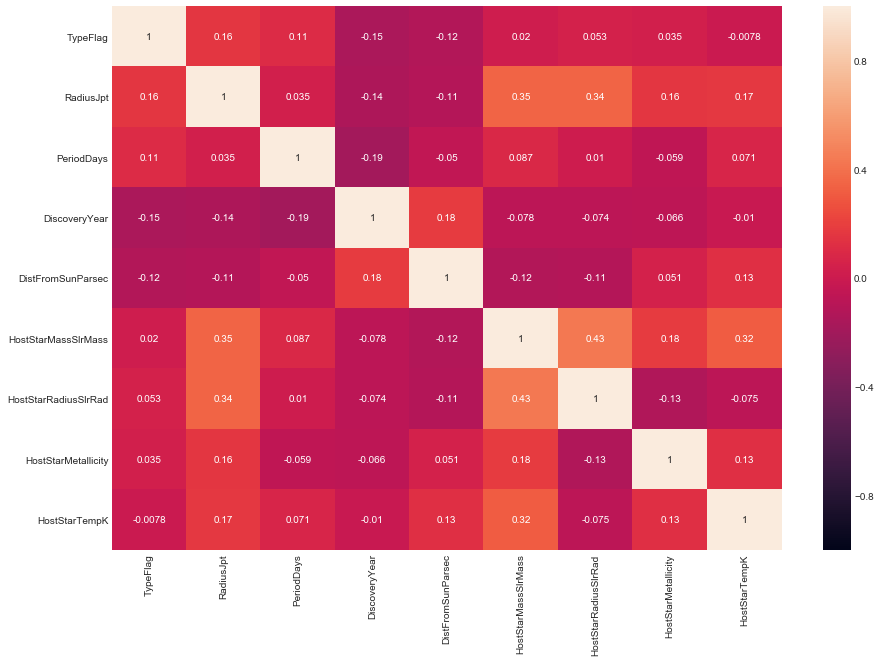

In [90]:
corrmat = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corrmat, vmax =1.0, vmin=-1.0, annot=True)
plt.show()

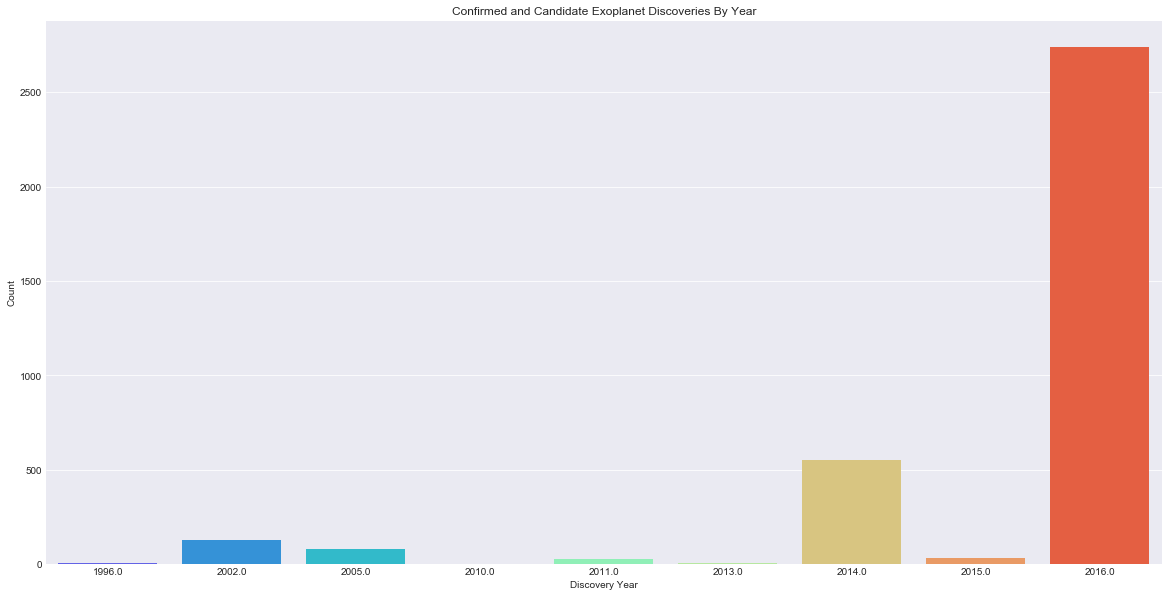

In [94]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(x=df['DiscoveryYear'], data=df['DiscoveryYear'], palette="rainbow")
plt.xlabel('Discovery Year')
plt.ylabel('Count')
plt.title('Confirmed and Candidate Exoplanet Discoveries By Year')
plt.show()

#ALT Graph
#sns.set_style("darkgrid")
#fig, ax = plt.subplots(figsize=(10, 10))
#sns.countplot(x=df['PlanetaryMassJpt'], data=df['PlanetaryMassJpt'], palette="rainbow")
#plt.xlabel('Mass Relative to Jupiter')
#plt.ylabel('Count')
#plt.title('Confirmed and Candidate Exoplanet Discoveries By Mass Relative to Jupiter')
#plt.show()

In [70]:
#Are most discovered exoplanets more or less massive than Jupiter?

#moremass = df.loc[lambda df: df['PlanetaryMassJpt']>=1.0, :]
#lessmass = df.loc[lambda df: df['PlanetaryMassJpt']<=1.0, :]

#fig, ax = plt.subplots(figsize=(20, 10))

#plt.hist(moremass['PlanetaryMassJpt'], label = 'More Mass', bins=np.arange(0, 10), alpha = 0.5)
#plt.axvline(moremass['PlanetaryMassJpt'].mean(), color='black', linestyle='solid', linewidth=2)
#plt.hist(lessmass['PlanetaryMassJpt'], label = 'Less Mass', bins=np.arange(0, 10), alpha = 0.5)
#plt.axvline(lessmass['PlanetaryMassJpt'].mean(), color='blue', linestyle='solid', linewidth=2)

#plt.title('Mass Distribution Relative to Jupiter')
#plt.xlabel('Mass Relative to Jupiter')
#plt.ylabel('Count')
#plt.legend(loc='upper right')
#plt.show()


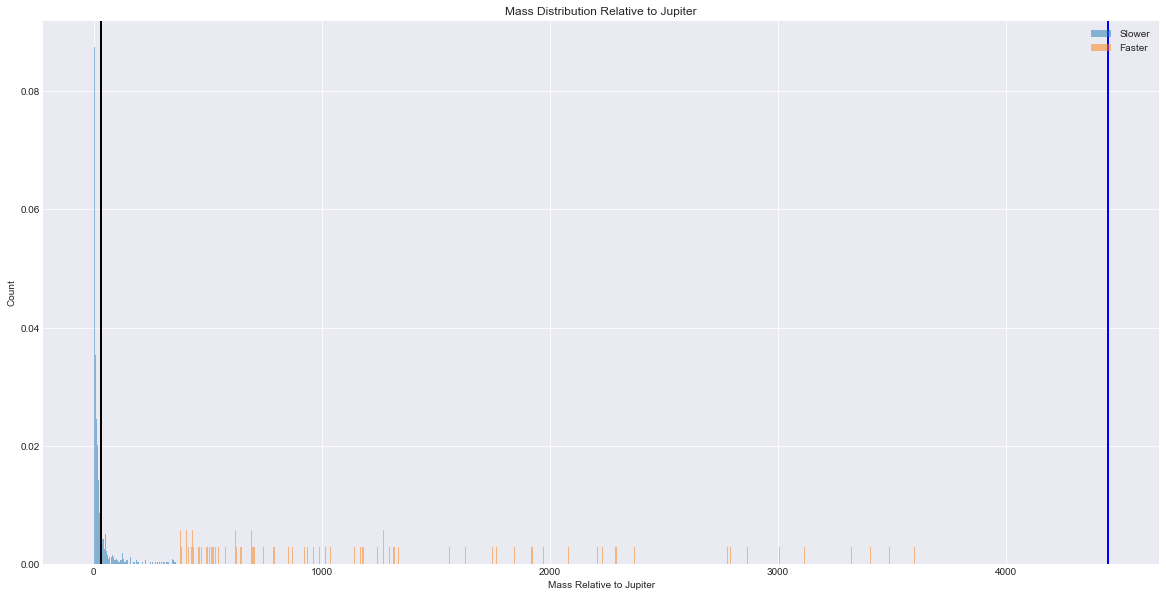

In [97]:
#Do most exoplanets have obits slower or faster than 365 days?

#df['slower'] = df.loc[lambda df: df['PeriodDays']<=365.0, :]
#faster = df.loc[lambda df: df['PeriodDays']>365.0, :]

df['orbitspeed'] = np.where(df['PeriodDays'] <=365.0, 1, 0)

fig, ax = plt.subplots(figsize=(20, 10))

plt.hist(slower['PeriodDays'], label = 'Slower', bins=np.arange(0, 4000), alpha = 0.5, normed=True)
plt.axvline(slower['PeriodDays'].mean(), color='black', linestyle='solid', linewidth=2)
plt.hist(faster['PeriodDays'], label = 'Faster', bins=np.arange(0, 4000), alpha = 0.5, normed=True)
plt.axvline(faster['PeriodDays'].mean(), color='blue', linestyle='solid', linewidth=2)

plt.title('Mass Distribution Relative to Jupiter')
plt.xlabel('Mass Relative to Jupiter')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()

In [118]:
#print(ttest_ind(slower, faster, equal_var=True, nan_policy='omit')) 

#scipy.stats.ttest_ind(df.dropna()(df.orbitspeed==1), df.dropna()(df.orbitspeed==0), nan_policy='omit') 

group1 = df.where(df.orbitspeed== 1) 
group2 = df.where(df.orbitspeed== 2)

scipy.stats.ttest_ind(group1, group2, nan_policy='omit')

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [100]:
scipy.stats.ttest_ind?

In [110]:
df.columns

Index(['PlanetIdentifier', 'TypeFlag', 'RadiusJpt', 'PeriodDays',
       'DiscoveryMethod', 'DiscoveryYear', 'DistFromSunParsec',
       'HostStarMassSlrMass', 'HostStarRadiusSlrRad', 'HostStarMetallicity',
       'HostStarTempK', 'ListsPlanetIsOn', 'orbitspeed'],
      dtype='object')

In [109]:
df['orbitspeed'] = np.where(df['PeriodDays'] <=365.0, 1, 0)